<a href="https://colab.research.google.com/github/cuzmyk/machine_learning/blob/main/2s_3pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [ ]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow
import keras
from keras import backend as K

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
num_classes = 10
batch_size = 10
epoch = 20
img_rows, img_cols = 28,28

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    trainX=trainX.reshape(trainX.shape[0],1,img_rows,img_cols)
    testX =testX.reshape(testX.shape[0],1,img_rows,img_cols)
    input_shape=(1,img_rows,img_cols)
else:
    trainX=trainX.reshape(trainX.shape[0],img_rows,img_cols,1)
    testX =testX.reshape(testX.shape[0],img_rows,img_cols,1)
    input_shape=(img_rows,img_cols,1)

trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)
Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


In [ ]:
trainy = keras.utils.to_categorical(trainy,num_classes=num_classes)
testy = keras.utils.to_categorical(testy,num_classes=num_classes)

## 1.3. Визуализируем часть данных из датасета

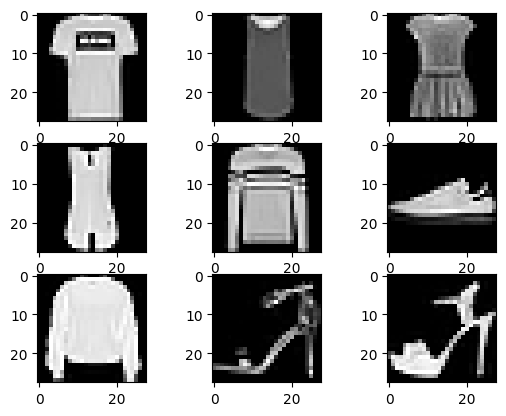

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

## 1.5. Обучаем модель

In [ ]:
# Ваш код
INIT_LR = 0.0000005
EPOCHS = 5

In [ ]:
#Компилируем модель, используя Adam как оптимизатор и категориальную кросс-энтропию
#в качестве функции потерь (для бинарной классификации следует использовать
#binary_crossentropy):
opt = Adam(learning_rate=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,
																					metrics=["accuracy"])

In [ ]:
# обавляем колбэки
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

In [ ]:
#Запустим процесс обучения модели
H = model.fit(trainX, trainy,
              validation_data=(testX, testy),
              epochs=EPOCHS,
              batch_size=batch_size,
              callbacks=[early_stopping, checkpoint])

Epoch 1/5
6000/6000 [==============================] - 239s 40ms/step - loss: 1.0876 - accuracy: 0.6399 - val_loss: 0.9126 - val_accuracy: 0.7180
Epoch 2/5
6000/6000 [==============================] - 239s 40ms/step - loss: 0.9916 - accuracy: 0.6647 - val_loss: 0.8320 - val_accuracy: 0.7369
Epoch 3/5
6000/6000 [==============================] - 240s 40ms/step - loss: 0.9250 - accuracy: 0.6857 - val_loss: 0.7783 - val_accuracy: 0.7458
Epoch 4/5
6000/6000 [==============================] - 241s 40ms/step - loss: 0.8756 - accuracy: 0.7014 - val_loss: 0.7396 - val_accuracy: 0.7542
Epoch 5/5
6000/6000 [==============================] - 239s 40ms/step - loss: 0.8345 - accuracy: 0.7127 - val_loss: 0.7098 - val_accuracy: 0.7597


## 1.6. Анализируем обученную модель. Строим график (графики) обучения

In [ ]:
# Загружаем лучшую модель:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
# Определите имена классов
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Выведите отчет о классификации
print(classification_report(testy.argmax(axis=1), predictions.argmax(axis=1), target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.78      0.76      1000
     Trouser       0.98      0.91      0.94      1000
    Pullover       0.59      0.57      0.58      1000
       Dress       0.71      0.86      0.78      1000
        Coat       0.51      0.70      0.59      1000
      Sandal       0.91      0.86      0.88      1000
       Shirt       0.46      0.19      0.26      1000
     Sneaker       0.83      0.88      0.85      1000
         Bag       0.90      0.92      0.91      1000
  Ankle boot       0.89      0.93      0.91      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.75      0.76      0.75     10000



1000/1000 [==============================] - 10s 10ms/step


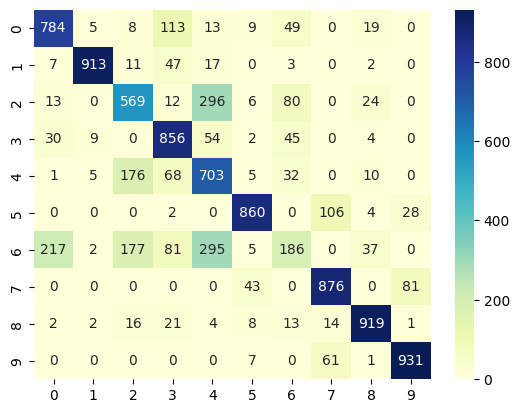

In [ ]:
# Выведем матрицу ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(testX, batch_size=10)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = testy.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

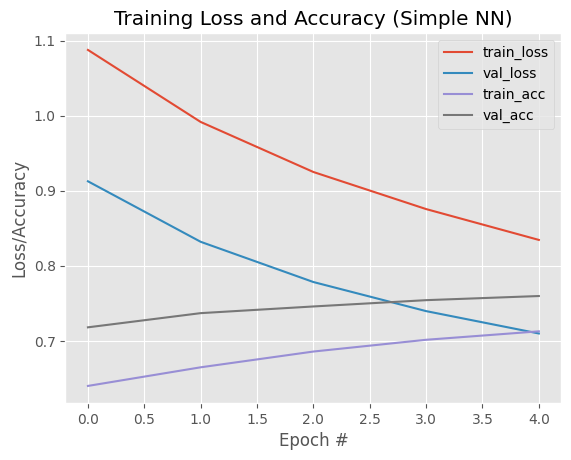

In [ ]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:

import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload()


labels = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}
# загружаем входное изображение, меняем его размер на необходимый и выводим его

image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

cv2_imshow(orig)

Saving Без названия (4).jpeg to Без названия (4).jpeg


In [ ]:
# делаем предсказание на изображении
predict = model.predict(image)
print(predict)

1/1 [==============================] - 0s 28ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
i = predict.argmax(axis=1)[0]
print(f" {labels[i]}")


 Bag


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from imutils import paths
import os
import tensorflow as tf
import random

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_height, img_width = 32, 32  # Размер изображения для LeNet
batch_size = 32

In [ ]:
# Ваш код
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/content/anim2/")))
print(imagePaths[10].split(os.path.sep)[-2])
random.shuffle(imagePaths)

cats


In [ ]:
# Путь к данным
data_dir = "/content/drive/MyDrive/content/anim2/"

In [ ]:
# Функция для загрузки изображений и меток
def load_images(imagePaths, compression_size=32):
    data = []
    labels = []

    for imagePath in imagePaths:
        # Загрузка изображения
        image = cv2.imread(imagePath)

        # Изменение разрешения изображения
        image = cv2.resize(image, (compression_size, compression_size))

        # Добавление изображения в список
        data.append(image)

        # Извлечение метки класса из пути к изображению
        label = imagePath.split(os.path.sep)[-2]

        # Добавление метки в список
        labels.append(label)

    return data, labels

In [ ]:
# Загрузка и подготовка данных
compression_size = 32
data, labels = load_images(imagePaths, compression_size)

In [ ]:
# Преобразование в массив numpy и нормализация данных
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# Преобразование меток в бинарные векторы
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
# Разделение данных на тренировочные и тестовые наборы
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, test_size=0.25, random_state=42)


In [ ]:
# Добавление размерности для каналов (как в mnist)
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

# Проверка формы данных
print(X_train.shape)
print(X_val.shape)

(45, 32, 32, 3, 1)
(15, 32, 32, 3, 1)


In [ ]:
# Реализация архитектуры сверточной нейронной сети LeNet-5
model = Sequential([
    Conv2D(6, (5, 5), strides=(1, 1), activation='tanh', input_shape=(compression_size, compression_size, 3)),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(16, (5, 5), strides=(1, 1), activation='tanh'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(units=120, activation='tanh'),
    Dense(units=84, activation='tanh'),
    Dense(units=len(lb.classes_), activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_14 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_15 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_8 (Flatten)         (None, 400)               0         
                                                                 
 dense_25 (Dense)            (None, 120)              

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
# Компиляция модели
INIT_LR = 0.0000005
EPOCHS = 10
model.compile(optimizer=Adam(learning_rate=INIT_LR), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Обучение модели с использованием ранней остановки и сохранения лучшей модели
#LeNet-5
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="best_model2.h5", monitor="val_accuracy", save_best_only=True, verbose=0)


In [ ]:
H = model.fit(X_train, Y_train,
              validation_data=(X_val, Y_val),
              epochs=EPOCHS,
              batch_size=10,
              callbacks=[early_stopping, checkpoint])

Epoch 1/10
5/5 [==============================] - 4s 203ms/step - loss: 1.0799 - accuracy: 0.3778 - val_loss: 1.0877 - val_accuracy: 0.4000
Epoch 2/10
1/5 [=====>........................] - ETA: 0s - loss: 1.0941 - accuracy: 0.3000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 64ms/step - loss: 1.0798 - accuracy: 0.3778 - val_loss: 1.0877 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 0s 104ms/step - loss: 1.0797 - accuracy: 0.3778 - val_loss: 1.0877 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 0s 101ms/step - loss: 1.0796 - accuracy: 0.3778 - val_loss: 1.0877 - val_accuracy: 0.4000
Epoch 5/10
5/5 [==============================] - 0s 107ms/step - loss: 1.0795 - accuracy: 0.3778 - val_loss: 1.0876 - val_accuracy: 0.4000
Epoch 6/10
5/5 [==============================] - 0s 110ms/step - loss: 1.0794 - accuracy: 0.3778 - val_loss: 1.0876 - val_accuracy: 0.4000
Epoch 7/10
5/5 [==============================] - 0s 100ms/step - loss: 1.0794 - accuracy: 0.3778 - val_loss: 1.0876 - val_accuracy: 0.4000
Epoch 8/10
5/5 [==============================] - 0s 103ms/step - loss: 1.0793 - accuracy: 0.3778 - val_loss: 1.0876 - val_accuracy: 0.4000
Epoch 9/10
5/5 [================

## 2.3. Сохраните полученные модели

In [ ]:
# Загружаем лучшую модель:
from keras.models import load_model

model = load_model("/content/best_model2.h5")

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
# Ваш код


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [ ]:
# Ваш код

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.datasets import fetch_olivetti_faces


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
train.shape

(320, 4096)

In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (320, 4096)
Test shape: (80, 4096)


Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

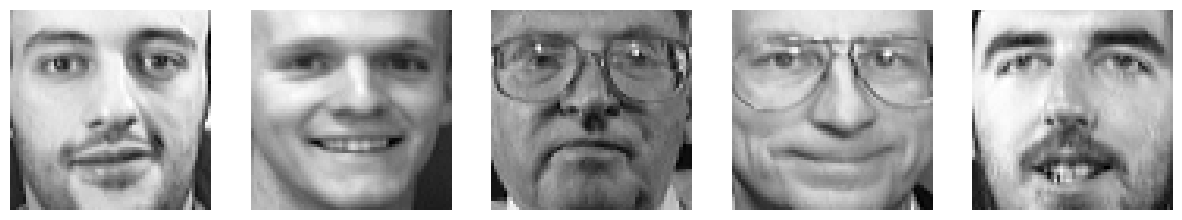

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

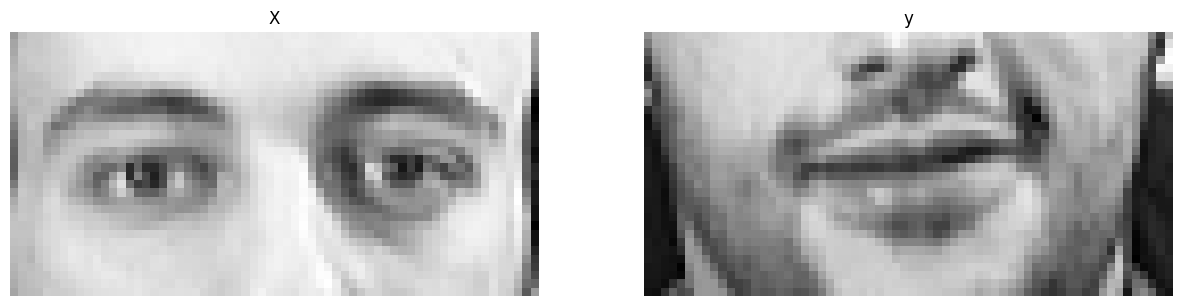

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

In [ ]:
import numpy as np

In [ ]:
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)

In [ ]:
X_train.shape

(320, 32, 64, 1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.optimizers import Adamax

In [ ]:
# Создаем модель

model = Sequential([
    Conv2D(512, (3,3), padding='same', activation='relu', input_shape=(32, 64, 1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(256, (5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(128, (5,5), padding='same', activation='relu'),

    Flatten(),

#    Dense(4096, activation='relu'),
    Dense(2048, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 64, 512)       5120      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 32, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 32, 256)       3277056   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 16, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 16, 128)        819328    
                                                                 
 flatten (Flatten)           (None, 16384)             0

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
# Компиляция модели
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
EPOCHS = 10
batch_size = 10

In [ ]:
# Выбираем одинаковое количество образцов из X_train и y_train_n_3d
num_samples = min(X_train.shape[0], y_train_n_3d.shape[0])
X_train_subset = X_train[:num_samples]
y_train_n_3d_subset = y_train_n_3d[:num_samples]

In [ ]:
# Изменяем форму y_train_n обратно на 3D
y_train_n_3d = y_train_n.reshape(y_train.shape[0], 32, 64)

# Проверяем размеры после изменения формы
print("X_train shape:", X_train.shape)
print("y_train_n_3d shape:", y_train_n_3d.shape)


X_train shape: (320, 32, 64)
y_train_n_3d shape: (320, 32, 64)


In [ ]:
history = model.fit(X_train, y_train_n, validation_data=(X_test, y_test_n),
	epochs=EPOCHS, batch_size=batch_size, verbose=0)

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь
preds = model.predict(X_test)

3/3 [==============================] - 5s 2s/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.08453456

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
!pip install ipyplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


In [ ]:
import ipyplot


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        



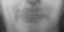
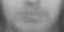
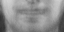
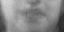
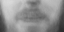
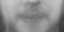
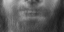
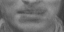
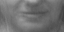
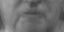


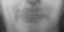
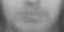
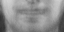
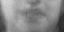
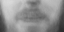
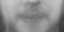
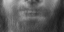
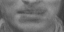
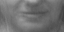
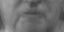

In [ ]:
# Ваш код здесь
preds = np.array([pred.reshape((32, 64)) for pred in preds])

img_count = 10

ipyplot.plot_images(preds[:img_count], [str(x) for x in range(img_count)], max_images=img_count, img_width=200)
plt.show()

Отрисуйте все предсказания.


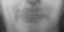
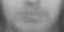
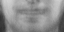
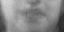
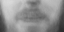
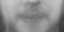
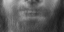
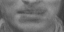
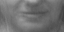
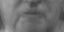


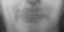
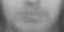
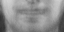
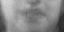
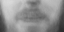
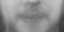
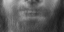
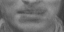
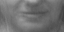
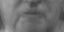

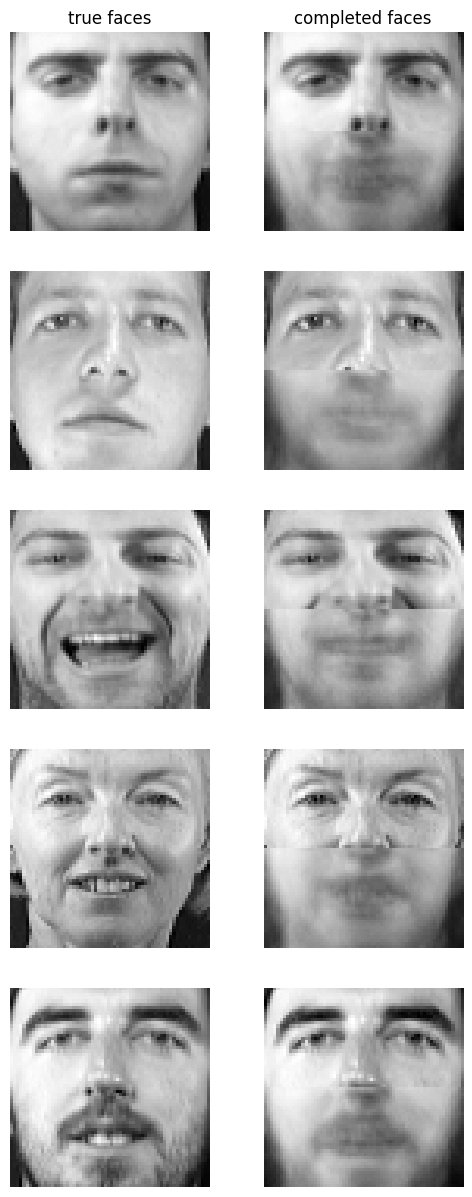

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipyplot

preds = np.array([pred.reshape((32, 64)) for pred in preds])  # Пример reshape

img_count = 10

ipyplot.plot_images(preds[:img_count], [str(x) for x in range(img_count)], max_images=img_count, img_width=200)
plt.show()

# Настройки для отрисовки
n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))

for i in range(n_faces):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")

    # Преобразуем preds[i], чтобы добавить ось канала
    preds_i = np.expand_dims(preds[i], axis=-1)  # Добавляем ось канала

    completed_face = np.vstack((X_test[i], preds_i))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2, title="completed faces")

    sub.axis("off")
    sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")

plt.show()